# 1. 데이터 생성
 - 남자, 여자 데이터 생성 군집화

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.randint(40, 70) # 40~70 중 난수 1개

54

In [20]:
data = []
for i in range(50):
    data.append([random.randint(40, 70), random.randint(140, 175)]) # 여자
    data.append([random.randint(60, 110), random.randint(170, 200)]) # 남자
data

[[58, 140],
 [63, 180],
 [57, 161],
 [94, 186],
 [70, 141],
 [94, 175],
 [60, 141],
 [71, 182],
 [66, 162],
 [88, 172],
 [58, 161],
 [74, 171],
 [52, 172],
 [70, 180],
 [43, 174],
 [103, 197],
 [63, 168],
 [70, 180],
 [64, 174],
 [61, 185],
 [52, 162],
 [91, 191],
 [49, 141],
 [95, 179],
 [63, 165],
 [65, 184],
 [51, 165],
 [99, 196],
 [69, 171],
 [104, 194],
 [64, 166],
 [68, 172],
 [66, 172],
 [84, 179],
 [67, 140],
 [64, 190],
 [64, 151],
 [63, 190],
 [45, 156],
 [81, 186],
 [68, 164],
 [110, 175],
 [44, 144],
 [62, 186],
 [65, 152],
 [60, 195],
 [59, 168],
 [77, 182],
 [56, 141],
 [84, 195],
 [60, 153],
 [87, 184],
 [48, 171],
 [70, 191],
 [66, 170],
 [79, 192],
 [70, 171],
 [69, 185],
 [48, 170],
 [69, 199],
 [52, 162],
 [86, 194],
 [54, 156],
 [93, 180],
 [43, 168],
 [98, 192],
 [58, 158],
 [79, 180],
 [40, 146],
 [99, 170],
 [44, 149],
 [64, 197],
 [61, 172],
 [99, 194],
 [43, 169],
 [106, 197],
 [41, 145],
 [90, 187],
 [43, 174],
 [63, 199],
 [47, 150],
 [89, 192],
 [64, 174],


In [21]:
# 여자
for female in data[:100:2]:
    print(female, end = '  ')
print()
print('-----------------------------------------------------------------------------------------------------------------')
for male in data[1:100:2]:
    print(male, end = '  ')

[58, 140]  [57, 161]  [70, 141]  [60, 141]  [66, 162]  [58, 161]  [52, 172]  [43, 174]  [63, 168]  [64, 174]  [52, 162]  [49, 141]  [63, 165]  [51, 165]  [69, 171]  [64, 166]  [66, 172]  [67, 140]  [64, 151]  [45, 156]  [68, 164]  [44, 144]  [65, 152]  [59, 168]  [56, 141]  [60, 153]  [48, 171]  [66, 170]  [70, 171]  [48, 170]  [52, 162]  [54, 156]  [43, 168]  [58, 158]  [40, 146]  [44, 149]  [61, 172]  [43, 169]  [41, 145]  [43, 174]  [47, 150]  [64, 174]  [48, 158]  [63, 142]  [43, 171]  [57, 147]  [57, 172]  [61, 148]  [61, 157]  [70, 149]  
-----------------------------------------------------------------------------------------------------------------
[63, 180]  [94, 186]  [94, 175]  [71, 182]  [88, 172]  [74, 171]  [70, 180]  [103, 197]  [70, 180]  [61, 185]  [91, 191]  [95, 179]  [65, 184]  [99, 196]  [104, 194]  [68, 172]  [84, 179]  [64, 190]  [63, 190]  [81, 186]  [110, 175]  [62, 186]  [60, 195]  [77, 182]  [84, 195]  [87, 184]  [70, 191]  [79, 192]  [69, 185]  [69, 199]  [8

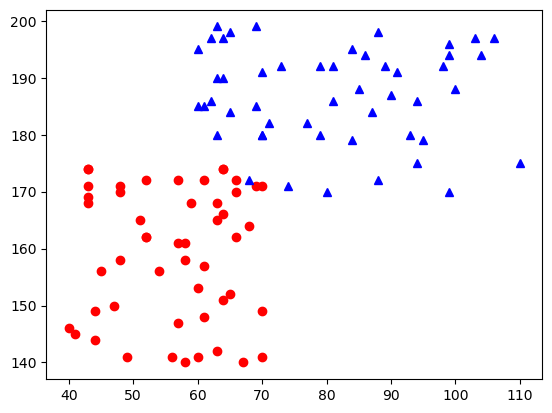

In [22]:
# x:몸무게, y:키
# print('여자 몸무게(x):', [d[0] for d in data[:100:2]])
# print('여자 신장(y):', [d[1] for d in data[:100:2]])
# print('남자 몸무게(x):', [d[0] for d in data[1:100:2]])
# print('남자 신장(y):', [d[1] for d in data[1:100:2]])
plt.plot([d[0] for d in data[:100:2]],
         [d[1] for d in data[:100:2]], 'o', color = 'r')
plt.plot([d[0] for d in data[1:100:2]],
         [d[1] for d in data[1:100:2]], '^', color = 'b')
plt.show()

# 2. 군집화 로직

In [46]:
# 초기 랜덤 지점 2개 (40~110, 140~200)
random_points = [[random.randint(40, 110), random.randint(140, 200)],
                 [random.randint(40, 110), random.randint(140, 200)]]
print('초기 랜덤 기준점:', random_points)

초기 랜덤 기준점: [[80, 148], [59, 182]]


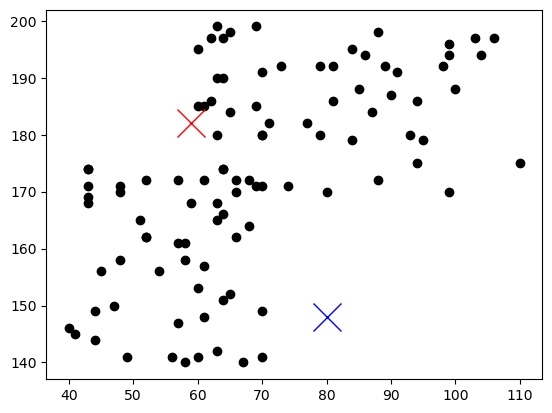

In [56]:
# plt.plot([d[0] for d in data], 
#          [d[1] for d in data], 
#          marker = 'o', 
#          color = 'k')
for x in data:
    plt.plot(x[0], x[1], 'ko')
plt.plot(random_points[0][0], random_points[0][1], 'bx', markersize = 20)
plt.plot(random_points[1][0], random_points[1][1], 'rx', markersize = 20)
plt.show()

In [49]:
# 두 점 사이의 거리를 return하는 함수  a = [0, 0] ~ b = [3, 4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
dist([1, 1], [4, 5])

5.0

In [50]:
dist(np.array([1, 1]), [4, 5])

5.0

In [51]:
dist(random_points[0], random_points[1])

39.96248240537617

In [52]:
# random_points[0]과 random_points[1]을 기준으로 두 영역을 나눔
group0 = [] # random_points[0]이 더 가까운 group
group1 = [] # random_points[1]이 더 가까운 group
for d in data:
    if dist(random_points[0], d) <= dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(27, 73)

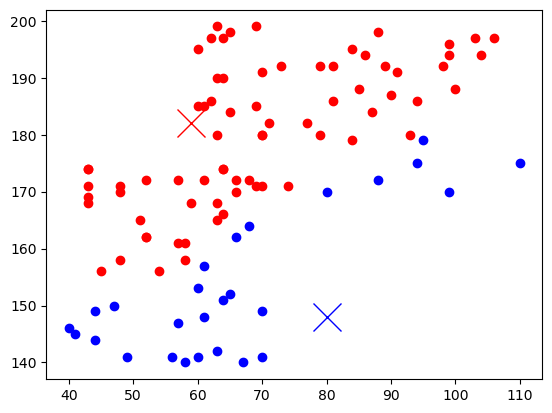

In [55]:
plt.plot(random_points[0][0], 
         random_points[0][1], 
         'bx', 
         markersize = 20)
plt.plot(random_points[1][0], 
         random_points[1][1], 
         'rx', 
         markersize = 20)
plt.plot([d[0] for d in group0], 
         [d[1] for d in group0], 
         'bo')
plt.plot([d[0] for d in group1], 
         [d[1] for d in group1], 
         'ro')

In [59]:
print('초기 랜덤 지점:', random_points)
# group0의 중심점과 group1의 중심점으로 만들어진 new_points 할당
sumX = 0; sumY = 0
for g in group0:
    sumX += g[0] # x축값 누적
    sumY += g[1]
new_points = [] # 새로운 기준점
new_points.append([sumX/len(group0), sumY/len(group0)]) # group0의 중간 지점
sumX = 0; sumY = 0
for g in group1:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX/len(group1), sumY/len(group1)]) # group1의 중간 지점
print([d[0] for d in group0])
print('새로운 기준점:', new_points)

초기 랜덤 지점: [[80, 148], [59, 182]]
[58, 70, 94, 60, 66, 88, 49, 95, 67, 64, 68, 110, 44, 65, 56, 60, 40, 99, 44, 41, 47, 80, 63, 57, 61, 61, 70]
새로운 기준점: [[65.81481481481481, 153.4814814814815], [69.41095890410959, 180.17808219178082]]


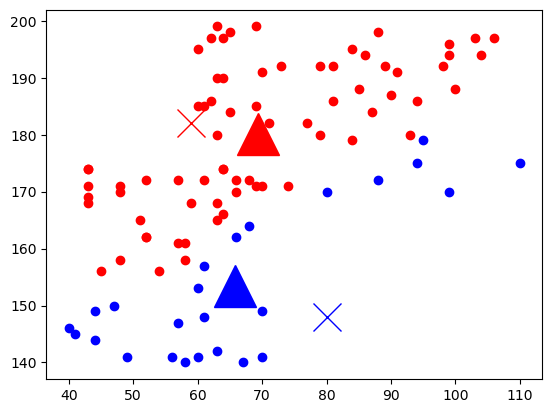

In [65]:
plt.plot(random_points[0][0], 
         random_points[0][1], 
         'bx', 
         markersize = 20)
plt.plot(random_points[1][0], 
         random_points[1][1], 
         'rx', 
         markersize = 20)
plt.plot([d[0] for d in group0], 
         [d[1] for d in group0], 
         'bo')
plt.plot([d[0] for d in group1], 
         [d[1] for d in group1], 
         'ro')
plt.plot(new_points[0][0], 
         new_points[0][1],
         'b^',
         markersize = 30)
plt.plot(new_points[1][0],
         new_points[1][1],
         'r^',
         markersize = 30)

In [67]:
# new_points[0]과 new_points[1] 두 영역을 나눔
group0 = []
group1 = []
for d in data:
    if dist(new_points[0], d) <= dist(new_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(34, 66)

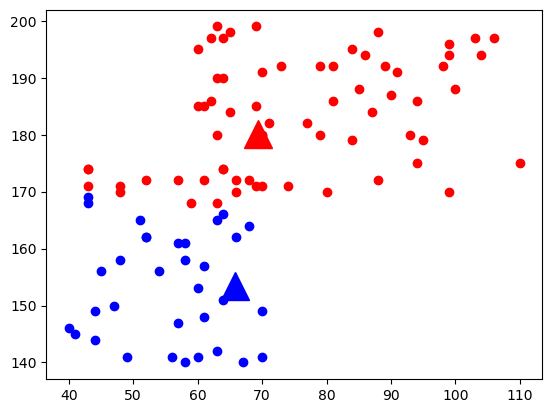

In [69]:
plt.plot([d[0] for d in group0], 
         [d[1] for d in group0], 
         'bo')
plt.plot([d[0] for d in group1], 
         [d[1] for d in group1], 
         'ro')
plt.plot(new_points[0][0], 
         new_points[0][1], 
         'b^',
         markersize = 20)
plt.plot(new_points[1][0], 
         new_points[1][1], 
         'r^',
         markersize = 20)

# 3. 전체 코드(for문 사용)

1 번째 기준점 [[64, 186], [41, 174]]
2 번째 기준점 [[81.203125, 180.765625], [51.27777777777778, 156.58333333333334]]
3 번째 기준점 [[83.96296296296296, 184.24074074074073], [54.54347826086956, 157.7608695652174]]
4 번째 기준점 [[86.39583333333333, 185.4375], [55.69230769230769, 159.71153846153845]]
5 번째 기준점 [[87.21739130434783, 185.8913043478261], [56.129629629629626, 160.27777777777777]]
6 번째 기준점 [[88.3409090909091, 186.02272727272728], [56.357142857142854, 161.08928571428572]]
7 번째 기준점 [[88.3409090909091, 186.02272727272728], [56.357142857142854, 161.08928571428572]]
8 번째 기준점 [[88.3409090909091, 186.02272727272728], [56.357142857142854, 161.08928571428572]]
9 번째 기준점 [[88.3409090909091, 186.02272727272728], [56.357142857142854, 161.08928571428572]]
10 번째 기준점 [[88.3409090909091, 186.02272727272728], [56.357142857142854, 161.08928571428572]]


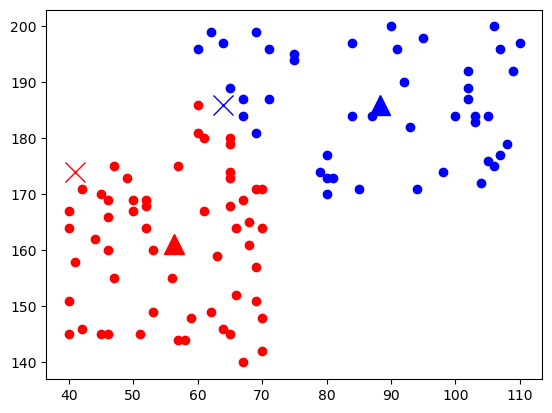

In [86]:
# 두 점 사이의 거리를 return하는 함수  a = [0, 0] ~ b = [3, 4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

data = []
for i in range(50):
    data.append([random.randint(40, 70), random.randint(140, 175)])  # 여자
    data.append([random.randint(60, 110), random.randint(170, 200)]) # 남자
    
points = [[random.randint(40, 110), random.randint(140, 200)],
          [random.randint(40, 110), random.randint(140, 200)]]
plt.plot(points[0][0], 
         points[0][1],
         'bx',
         markersize = 15)
plt.plot(points[1][0],
         points[1][1],
         'rx',
         markersize = 15)

for i in range(1, 11):
    print(i, '번째 기준점', points)
    group0 = []
    group1 = []
    for d in data:
        if dist(points[0], d) <= dist(points[1], d):
            group0.append(d)
        else:
            group1.append(d)
    sumX = 0; sumY = 0
    points = []
    for g in group0:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX/len(group0), sumY/len(group0)]) # group0들의 중심점
    sumX = 0; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX/len(group1), sumY/len(group1)]) # group1들의 중심점
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'bo')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'ro')
plt.plot(points[0][0], points[0][1], 'b^', markersize = 15)
plt.plot(points[1][0], points[1][1], 'r^', markersize = 15)
plt.show()

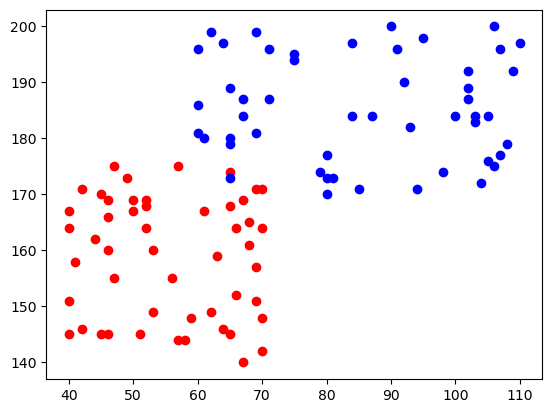

In [87]:
plt.plot([d[0] for d in data[:100:2]], 
         [d[1] for d in data[:100:2]], 
         'ro')
plt.plot([d[0] for d in data[1:100:2]], 
         [d[1] for d in data[1:100:2]], 
         'bo')
plt.show()

# 4. API(sklearn)를 이용한 군집분석
- sklearn: 머신러닝 패키지

In [89]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters = 2,    # 2개 group으로 군집분석
               init = 'random',   # 군집화 초기화 방법
               n_init = 10,       # 군집화를 반복 수행할 횟수
               random_state = 42) # seed값
model.fit(data)

C:\Users\4545\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [90]:
model.cluster_centers_ # 최종 중심점

array([[ 88.34090909, 186.02272727],
       [ 56.35714286, 161.08928571]])

In [91]:
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [99]:
model.predict(np.array([[99, 199],
                        [50, 160]]))

array([0, 1])

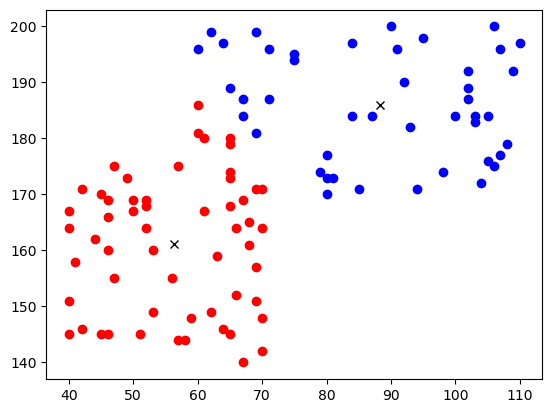

In [111]:
# print('모델의 1번 group의 x값:\n', data[model.labels_ == 1, 0])
# print('모델의 1번 group의 y값:\n', data[model.labels_ == 1, 1])
# print('모델의 0번 group의 x값:\n', data[model.labels_ == 0, 0])
# print('모델의 0번 group의 y값:\n', data[model.labels_ == 0, 1])
plt.plot(data[model.labels_ == 1, 0],
         data[model.labels_ == 1, 1], 'ro')
plt.plot(data[model.labels_ == 0, 0],
         data[model.labels_ == 0, 1], 'bo')
plt.plot(model.cluster_centers_[0][0],
         model.cluster_centers_[0][1], 'kx')
plt.plot(model.cluster_centers_[1][0],
         model.cluster_centers_[1][1], 'kx')
plt.show()